In [202]:
import pandas as pd
import seaborn as sn
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import sklearn.ensemble as ek
import joblib
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.metrics,keras.losses
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


data=pd.read_csv('data.csv',sep='|')
data.head()
print(data.columns)


Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [203]:

X = data.drop(['Name','md5','legitimate'],axis=1).values
Y = data['legitimate'].values
print(Y)
extratrees = ek.ExtraTreesClassifier().fit(X,Y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

[1 1 1 ... 0 0 0]


In [205]:
nbfeatures

12

In [206]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]
for i in range(nbfeatures):
    features.append(data.columns[2+i])

In [207]:
oversample = RandomOverSampler(sampling_strategy=1.0)
#X_resampled, Y_resampled = oversample.fit_resample(X_new,Y)
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=42)

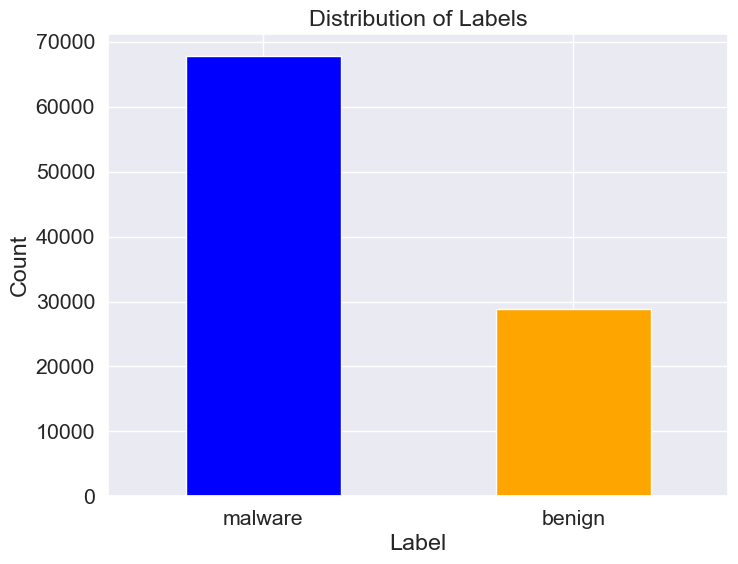

In [208]:
labels = pd.Series(y_train)

# Contar el número de ocurrencias de cada etiqueta
label_counts = labels.value_counts()
# Crear un diagrama de barras
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['malware', 'benign'], rotation=0)
plt.show()

In [209]:
from keras.layers import Dropout
from keras import regularizers
model = Sequential()
model.add(Dense(128, input_dim=X_new.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
#--------------------------Predicting on Test Set --------------------------
# models=Sequential()
# models.add(Dense(10, input_dim=X_resampled.shape[1], activation=keras.activations.relu))
# models.add(Dense(3, activation=keras.activations.relu))
# models.add(Dense(units=1, activation=keras.activations.sigmoid))
# models.compile(optimizer='adam', metrics=['accuracy'], loss=keras.losses.binary_crossentropy)
# results = models.fit(X_train, y_train, epochs=10)

Epoch 1/10


c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1510/1510 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3008 - loss: 12091456.0000 - val_accuracy: 0.3009 - val_loss: 2893528.7500
Epoch 2/10
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3292 - loss: 16823718.0000 - val_accuracy: 0.3014 - val_loss: 15165092.0000
Epoch 3/10
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2977 - loss: 12922529.0000 - val_accuracy: 0.3013 - val_loss: 13037985.0000
Epoch 4/10
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3161 - loss: 13328770.0000 - val_accuracy: 0.3010 - val_loss: 23410078.0000
Epoch 5/10
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3536 - loss: 22374872.0000 - val_accuracy: 0.3149 - val_loss: 28016356.0000
Epoch 6/10
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4759 - loss: 25844156.0000 - val_accuracy: 0.3077 - val_loss: 33049044.0000
Epoch 7/10
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6286 - loss: 24149272.0000 - val_accuracy: 0.3801 - val_loss: 38486192.0000
Epoc

# Trees diferentes

In [210]:
modelTree = { "DecisionTree": DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50)}

In [211]:
results = {}
for algo in modelTree:
    clf = modelTree[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    # Mostrar el nombre del modelo y su precisión
    print("%s : %s" % (algo, score))
    
    # Calcular y mostrar la matriz de confusión
    print("Confusion Matrix for %s:" % algo)
    print(confusion_matrix(y_test, y_pred))
    
    # Mostrar el reporte de clasificación
    print("Classification Report for %s:" % algo)
    print(classification_report(y_test, y_pred))
    
    # Almacenar los resultados para comparación
    results[algo] = score

DecisionTree : 0.9909694555112882
Confusion Matrix for DecisionTree:
[[28741   193]
 [  181 12300]]
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28934
           1       0.98      0.99      0.99     12481

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415

RandomForest : 0.9938186647349994
Confusion Matrix for RandomForest:
[[28778   156]
 [  100 12381]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28934
           1       0.99      0.99      0.99     12481

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



## Matrices de confusion:


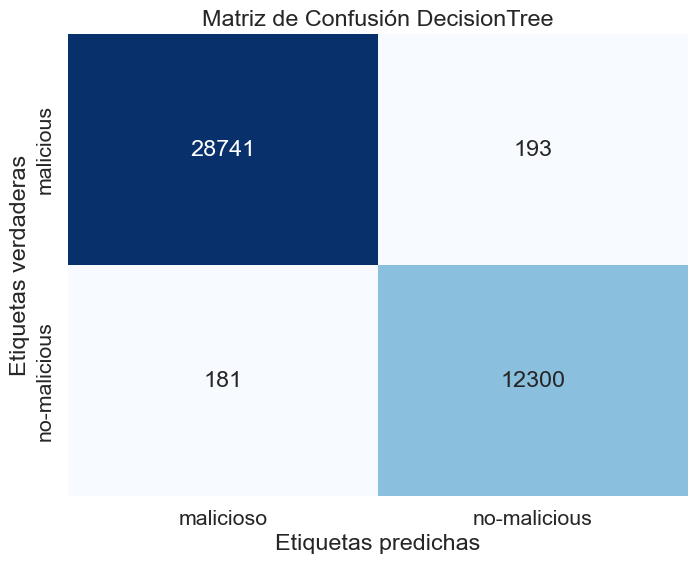

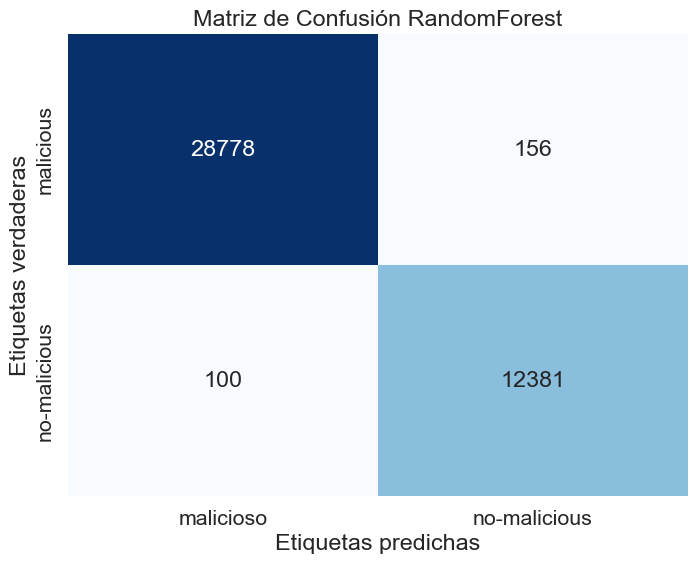

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


for algo in modelTree:
    y_pred_prob = modelTree[algo].predict(X_test)
    y_pred = np.round(y_pred_prob).astype(int).ravel()
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)  # Ajustar tamaño de fuente
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['malicioso', 'no-malicious'],
            yticklabels=['malicious', 'no-malicious'])
    plt.xlabel('Etiquetas predichas')
    plt.ylabel('Etiquetas verdaderas')
    plt.title('Matriz de Confusión %s' %algo)
    plt.show()

## Guardando el modelo


In [213]:
import pickle
joblib.dump(modelTree['RandomForest'],'classifier.pkl')
open('features.pkl', 'wb').write(pickle.dumps(features))

232

# Continuación de Modelo Secuencial

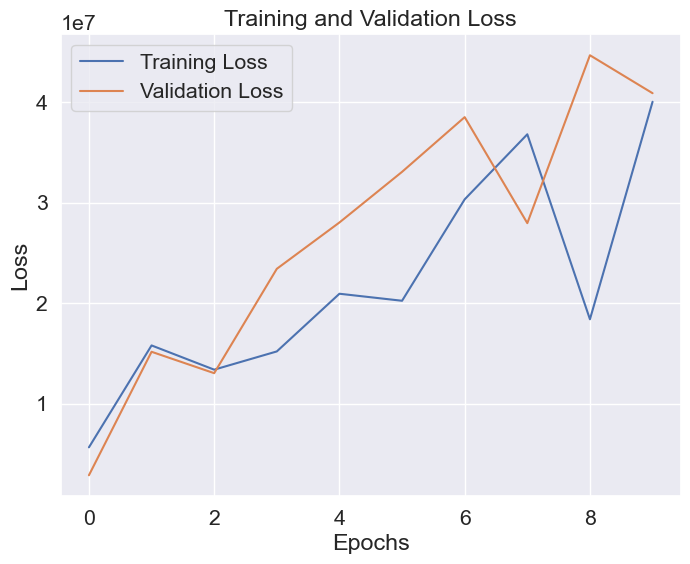

In [214]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [195]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[26909  2045]
 [ 1249 27832]]


In [215]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Accuracy: 0.937196671962738


1295/1295 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step


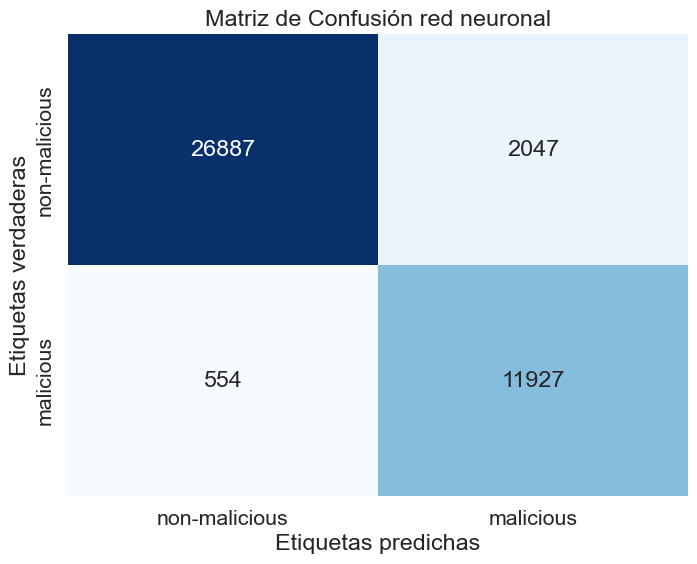

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Hacer predicciones en los datos de prueba
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int).ravel()
# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajustar tamaño de fuente
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['non-malicious', 'malicious'],
            yticklabels=['non-malicious', 'malicious'])
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión red neuronal')
plt.show()

## GUARDANDO EL MODELO

In [140]:
model.save('capable_modle_v1.keras')

DATA MODELO ON FIRE:

In [ ]:
# Get the list of layers in the model
layers = models.layers

# Loop through each layer and extract weights and biases
for layer in layers:
    # Get the weights and biases
    weights = layer.get_weights()

    if len(weights) > 0:
        # For layers with weights (e.g., Dense and Conv2D)
        layer_weights, layer_biases = weights

        # Access specific values
        print(f"Layer: {layer.name}")
        print("Weights:")
        print(layer_weights)
        print("Biases:")
        print(layer_biases)
    else:
        # For layers without weights (e.g., Activation)
        print(f"Layer: {layer.name} has no trainable parameters")

    print("\n")

Layer: dense_11
Weights:
[[ 0.03978908  0.08708581  0.08023651 ...  0.12379139  0.11515905
  -0.03768681]
 [ 0.03618697 -0.09255778 -0.07245496 ... -0.02138887  0.04083215
   0.08998492]
 [ 0.09655696 -0.03304247  0.10180578 ... -0.00431061  0.12859802
  -0.0644528 ]
 ...
 [-0.06022538  0.03547155  0.00209096 ...  0.01573976 -0.07185908
   0.10263399]
 [ 0.11783777  0.00742175 -0.10795807 ... -0.02102851 -0.04477379
  -0.03771634]
 [ 0.11766507 -0.06471125  0.00028312 ... -0.11822831 -0.02233056
  -0.04804476]]
Biases:
[ 0.01090419 -0.00827806  0.04872265 -0.00665383 -0.0155252   0.02219261
 -0.00241788  0.04220413  0.03030235 -0.01051115]


Layer: dense_12
Weights:
[[ 0.20737678 -0.4529284  -0.6529571 ]
 [-0.5353682  -0.36549386 -0.0887709 ]
 [ 0.07137406  0.28404546  0.6870304 ]
 [ 0.11825055 -0.37268317  0.04076571]
 [-0.15230086 -0.14397237 -0.22485062]
 [-0.00196769  0.65423584 -0.41033283]
 [-0.5176329  -0.20500237 -0.4335897 ]
 [ 0.2555709  -0.10643621  0.4722894 ]
 [-0.4514369 

# Pruebas MODELOS


In [201]:
%run main.py "/test_Programs/vmware.exe"

 __  __       _                          ____       _            _             
|  \/  | __ _| |_      ____ _ _ __ ___  |  _ \  ___| |_ ___  ___| |_ ___  _ __ 
| |\/| |/ _` | \ \ /\ / / _` | '__/ _ \ | | | |/ _ \ __/ _ \/ __| __/ _ \| '__|
| |  | | (_| | |\ V  V / (_| | | |  __/ | |_| |  __/ ||  __/ (__| || (_) | |   
|_|  |_|\__,_|_| \_/\_/ \__,_|_|  \___| |____/ \___|\__\___|\___|\__\___/|_|   
                                                                               

 Welcome to antimalware detector 

 1. PE scanner
 3. Exit

 __  __       _                          ____       _            _             
|  \/  | __ _| |_      ____ _ _ __ ___  |  _ \  ___| |_ ___  ___| |_ ___  _ __ 
| |\/| |/ _` | \ \ /\ / / _` | '__/ _ \ | | | |/ _ \ __/ _ \/ __| __/ _ \| '__|
| |  | | (_| | |\ V  V / (_| | | |  __/ | |_| |  __/ ||  __/ (__| || (_) | |   
|_|  |_|\__,_|_| \_/\_/ \__,_|_|  \___| |____/ \___|\__\___|\___|\__\___/|_|   
                                                           

ValueError: invalid literal for int() with base 10: 'N'